In [1]:
from importlib import reload
from libs import io , cv2 , np

import preprocessing as pp
import roi as roi
import detection as detect
from classifier import H3T_Classifier
from numbers_classifier import H3T_Numbers_Classifier
import videoread as vr
import cameraread as cr
from skimage import filters


SyntaxError: invalid syntax (numbers_classifier.py, line 11)

In [ ]:
from scipy.io import loadmat
mnist = loadmat("./dataset/new_numbers/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0] 
pp.show_images([mnist_data[40000].reshape(28 , 28)])
print(mnist_label[40000])

In [ ]:

reload(roi)
reload(detect)
reload(vr)
reload(cr)

In [2]:
# INIT

sign_imgs_corr = detect.get_corrleation_matrices("../dataset/corr_signs")


In [3]:
numbers_classifier = H3T_Numbers_Classifier()

In [4]:
# numbers_classifier.load_dataset()
numbers_classifier.prepare_training_data("../dataset/standard_numbers/training_data")


digit 0 done
digit 1 done
digit 2 done
digit 3 done
digit 4 done
digit 5 done
digit 6 done
digit 7 done
digit 8 done
digit 9 done
10334 10334


In [5]:
numbers_classifier.train("svm")

In [6]:
numbers_classifier.save_trained_model()

In [7]:
numbers_classifier.load_trained_model()

In [75]:
video_path = '../dataset/videos/IMG_5107.MOV'
video_frames_folder = '../dataset/video_frames'
vr.clear_folder(video_frames_folder)
video_frames = vr.extract_frames(video_path, video_frames_folder, fps=15)

Frame 0 saved to ../dataset/video_frames/frame_0.jpg
Frame 15 saved to ../dataset/video_frames/frame_15.jpg
Frame 30 saved to ../dataset/video_frames/frame_30.jpg
Frame 45 saved to ../dataset/video_frames/frame_45.jpg
Frame 60 saved to ../dataset/video_frames/frame_60.jpg
Frame 75 saved to ../dataset/video_frames/frame_75.jpg
Frame 90 saved to ../dataset/video_frames/frame_90.jpg
Frame 105 saved to ../dataset/video_frames/frame_105.jpg
Frame 120 saved to ../dataset/video_frames/frame_120.jpg
Frame 135 saved to ../dataset/video_frames/frame_135.jpg
Frame 150 saved to ../dataset/video_frames/frame_150.jpg
Frame 165 saved to ../dataset/video_frames/frame_165.jpg
Frame 180 saved to ../dataset/video_frames/frame_180.jpg
Frame 195 saved to ../dataset/video_frames/frame_195.jpg
Frame 210 saved to ../dataset/video_frames/frame_210.jpg
Frame 225 saved to ../dataset/video_frames/frame_225.jpg
Frame 240 saved to ../dataset/video_frames/frame_240.jpg
Frame 255 saved to ../dataset/video_frames/fram

In [ ]:
# cr.capture_frames_from_camera()

In [ ]:
from skimage.feature import hog
image = io.imread("../speed_classification/road_sign_dataset/training_set/speed_50/50 (30).png")
resized_img = cv2.resize(image, (128, 128))
gray_image = pp.gray_image(resized_img)   
feature_vector , transformed_hog = hog(gray_image , visualize = True  , pixels_per_cell=(8 , 8) , cells_per_block=(4 , 4) , transform_sqrt=True)
pp.show_images([gray_image, transformed_hog])

In [76]:
# image = io.imread("../dataset/screenshots/3.jpg")
image = video_frames[-6]

In [77]:
# Load the image
# image = io.imread("../dataset/testcase10.png")


In [78]:

resized_img = cv2.resize(image, (1280, 720))

#pp.show_images([image], ["Input Image"])

cropped_img = cv2.hconcat([resized_img[:, :(resized_img.shape[1] // 3)]  , resized_img[:, 2 * (resized_img.shape[1] // 3):]])

# Convert the image to grayscale
gray_image = pp.gray_image(resized_img)

equalized_image = pp.HistogramEqualization(gray_image)

# Apply edge detection
edge_image = pp.LoGEdgeDetection(equalized_image)

# show pp images
#pp.show_images([resized_img, image, cropped_img], ["Input Image", "Cropped Image", "Edge Image"])


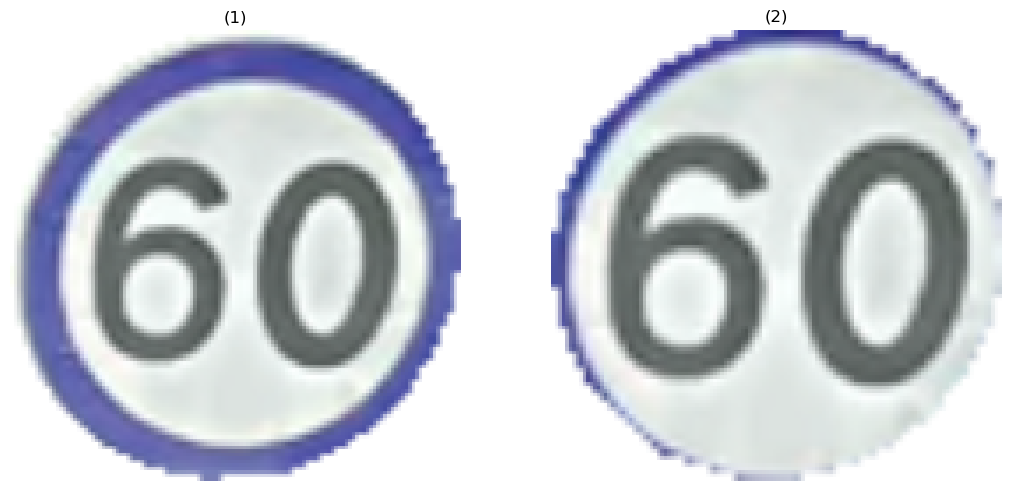

In [79]:

# Extract ROIs
rois = roi.extract_roi(edge_image , resized_img)

# print(rois[0].shape)
#show rois

# new_images = []
# for i in range(len(rois)):
#     #  rois[i] = pp.gray_image(rois[i])
#      new_images.append(pp.HistogramEqualization(rois[i]))

pp.show_images(rois)

In [1]:
if (len(rois)  == 0):
    print("no rois")
else:
    detected_image_index = detect.detect_sign(rois, sign_imgs_corr)
    print(detected_image_index) 
    if detected_image_index != -1:

        new_image = pp.gray_image(rois[detected_image_index])

        # #perform opening
        kernel = np.ones((4,4), np.uint8)
        new_image = cv2.erode(new_image, kernel, iterations=2)
        new_image = cv2.dilate(new_image, kernel, iterations=1)
        
        cropped_img = new_image[ 30:100 , 25:61 ]
        
        resized_img = cv2.resize(cropped_img , (16, 32))

        # thrsholded_image = np.zeros_like(new_image)
        threshold = filters.threshold_otsu(resized_img)


        print(threshold)
        thresholded_image = np.zeros(resized_img.shape)
        thresholded_image[resized_img  > threshold] = 1
        pp.show_images([new_image,cropped_img,resized_img , thresholded_image])



        print(f'prediction is {numbers_classifier.predict(resized_img)}')
    else:
        print("no sign detected")


NameError: name 'rois' is not defined